# Equação de Schrodinger independente do tempo 1D

Escrevemos a equação fazendo $RY=\hbar^2 /(2m)$:
$$-RY\frac{\partial^2 \Psi}{\partial x^2}+V(x)=E\Psi$$


Discretizamos as derivadas parciais utilizando o método de diferenças finitas, fazendo a primeira derivada pela direita e a segunda pela esquerda para diminuir o erro:

$$\frac{\partial \Psi}{\partial x} \approx \frac{\Psi(x+\Delta x)-\Psi(x)}{\Delta x}$$

$$\frac{\partial \Psi}{\partial x} \approx \frac{\Psi(x)-\Psi(x-\Delta x)}{\Delta x}$$

Utilizando a notação com índices inteiros $[\Psi(x-\Delta x), \Psi(x), \Psi(x+\Delta x)]\rightarrow [\Psi_{i-1},\Psi_i, \Psi_{i+1}]$  e aplicando as derivadas acima, a equação original fica:

$$\frac{-RY\left(\Psi_{i-1}-2\Psi_{i}+\Psi_{i+1}\right)}{\Delta x^2}+V_i \Psi_i=E\Psi_i$$

Definindo $a={-RY}/{\Delta x ^2}$:
$$a\left(\Psi_{i-1}-2\Psi_{i}+\Psi_{i+1}\right)+V_i \Psi_i=E\Psi_i$$
 
Suponha um vetor $\Psi$ contendo todos os valores discretos de uma função de onda unidimensional representada por $N$ pontos com uma indexação de que vai $i=1$ até $i=N$, ou seja:

$$\Psi=\begin{bmatrix}\Psi_{1}\\\Psi_{2}\\\Psi_3\\\vdots \\ \Psi_{N}\end{bmatrix}$$

Rearrajando as equações de uma forma conveniente, ficamos com o seguinte sistema:
 
$$\begin{matrix}
a\Psi_{0}&+& (V_1-2a)\Psi_{1}&+& a\Psi_{2}  &= & E\Psi_1 \\ 
a \Psi_{1}&+&(V_2-2a)\Psi_{2}&+&a\Psi_{3}& = & E\Psi_2 \\ 
a \Psi_{2}&+&(V_3-2a)\Psi_{3}&+&a\Psi_{4}& = & E\Psi_3 \\ 
\vdots & +& \vdots&+& \vdots & = &\vdots\\ 
a\Psi_{N-1}&+&(V_{N}-2a)\Psi_{N}&+&a\Psi_{N+1}& = & E\Psi_{N}
\end{matrix}$$

Note que na primeira e última equações do sistema acima, do lado esquerdo da igualdade, temos os termos $\Psi_0$ e $\Psi_{N+1}$, que não correspondem a nenhuma componente do nosso vetor da função de onda discreta $\Psi$. Nós iremos utilizá-los para definir as condições de contorno (o valor da função de onda nas bordas do sistema).

## Condições de contorno

### Fronteiras Fixas (poço infinito)

Nessa condição forçamos a função de onda a ser 0 nas bordas, ou seja

$$\Psi_0=\Psi_{N+1}=0$$

### Condição de contorno periódica

Nessa condição forçamos a função de onda no último ponto a ser igual ao valor do primeiro ponto no grid. 

$$\Psi_0=\Psi_{N+1}=\Psi_{1}=\Psi_{N}$$

## Equação matricial

Aplicando a condição de contorno do poço infinito, temos:
$$\begin{matrix}
0&+& \color{blue}{(V_1-2a)}\Psi_{1}&+& \color{blue}a \Psi_{2}  &= & E\Psi_1 \\ 
\color{red}a \Psi_{1}&+&\color{red}{(V_2-2a)}\Psi_{2}&+&\color{red}a\Psi_{3}& = & E\Psi_2 \\ 
\color{orange}a \Psi_{2}&+&\color{orange}{(V_3-2a)}\Psi_{3}&+&\color{orange}a \Psi_{4}& = & E\Psi_3 \\ 
\vdots & +& \vdots&+& \vdots & = &\vdots\\ 
\color{purple}a\Psi_{N-2}&+&\color{purple}{(V_{N-1}-2a)} \Psi_{N-1}& +&\color{purple}a \Psi_{N}&= & E\Psi_{N-1}\\
\color{green}a\Psi_{N-1}&+&\color{green}{(V_{N}-2a)} \Psi_{N}&+&0& = & E\Psi_{N}
\end{matrix}$$

Esse sistema pode ser reescrito como uma matriz do tipo:
$$\begin{bmatrix}  \color{blue}{(V_1-2a)} & \color{blue}a & 0  & 0 & 0 & 0\\
\color{red}a & \color{red}{(V_2-2a)} & \color{red}a  & 0 & 0 &0 \\
0&\color{orange}a & \color{orange}{(V_3-2a)} &  \color{orange}a  & 0  &0  \\
 0 & 0 & \ddots & \ddots & \ddots & 0 \\
0& 0 & 0  & \color{purple}a & \color{purple}{(V_{N-1}-2a)}& \color{purple}a\\
0& 0 & 0 & 0 & \color{green}a & \color{green}{(V_{N}-2a)} 
\end{bmatrix} 
\begin{bmatrix}\Psi_{1}\\\Psi_2\\\Psi_3\\\vdots \\\Psi_{N-1}\\ \Psi_{N}\end{bmatrix}=E\begin{bmatrix}\Psi_{1}\\\Psi_2\\\Psi_3\\\vdots \\ \Psi_{N-1}\\\Psi_{N}\end{bmatrix}$$

Isso é equivalente a um problema de autovetores e autovalores, onde a matriz quadrade de ordem $N$ acima é o operador Hamiltoniano $\hat{H}$:

$$\hat{H}\Psi=E\Psi$$

Podemos diagonalizá-lo para obter os autovalores e seus respectivos autovetores. Os autovetores serão vetores $\Psi_n$ com $N$ componentes representando as respectivas funções de ondas dos estados $n$, e os autovalores $E$ serão as energias correspondentes aos respectivos estados. 

## Resolvendo a equação matricial

Neste contexto, uma matriz $100\times 100$ é considerada pequena, já que isso significa que sua função de onda contínua será representada por apenas $100$ pontos. Mesmo assim, diagonalizar uma matriz de ordem $100$ é extremamente trabalhoso de forma analítica. Para nossa felicidade, uma vez que a matriz estiver construída, o pacote `NumPy` nos permite fazer tudo isso em uma única linha de comando. Também poderemos utilizar o pacote `SciPy` para construir uma matriz esparsa $N\times N$ (nessa caso tridiagonal) em uma única linha também.

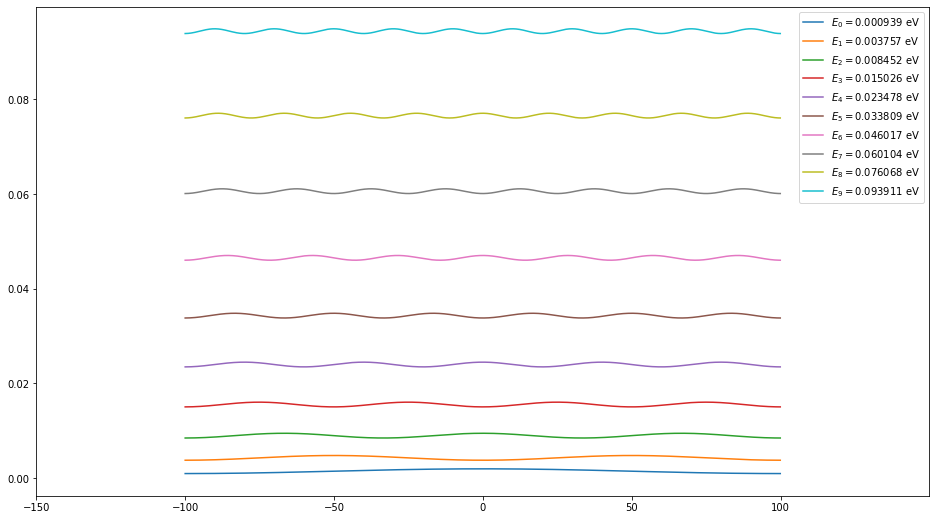

In [65]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
dx=0.1 #Define dx (angstroms)
RY=13.6056980659 #x*RY: Rydberg -> ev
ang=1.88973 #X/ang: raio de bohr -> angstroms

dx=dx*ang #dx para raio de bohr
a=-1/(dx**2) #Define 'a' por conveniência

x=np.arange(-100*ang ,100*ang,dx) #Define o vetor posição (raio de bohr)
N, L=(x.size, x.max()-x.min()) #Armazena o tamanho do vetor posição e o comprimento do espaço que ele representa

V=sparse.diags([0],[0],shape=(N,N)).toarray() #Cria uma matriz NxN com o potencial V(x)
H=H+V
H=sparse.diags([a,-2*a,a],[-1,0,1],shape=(N,N)).toarray() #Cria a matriz Hamiltoniano
eig, psi=np.linalg.eigh(H) #Resolve o sistema e atribui-se: eig=autovalores, psi=autovetores
psi=np.abs(psi)**2 #Atribui a densidade de probabilidade |Psi|² a variável psi, por conveniência

#V=np.diag(V,k=0)

eig=eig*RY #Ryd->eV
x=x/ang #RBohr->angstroms

fig, ax=plt.subplots(figsize=(16,9))
ax.set_xlim([x.min()-50, x.max()+ 50])
for i in range(10):
    fig=plt.plot(x,psi[i,:]+eig[i],label=f'$E_{i}={eig[i]:2f}$ eV')
fig=plt.plot(x,V,'k')
leg=plt.legend(loc='upper right')
plt.show()

#ana=RY*(np.pi**2)/(L**2)
#ne=1600
#anal=np.zeros((ne))
#for i in range(0,ne):
#    anal[i]=ana*(i+1)**2
#plt.plot(range(ne),anal,label='analitico')
#plt.plot(range(ne),eig[0:ne],label='numerico')